# Caleb Owens Notebook - Predictive ML Project

- Author: [Caleb Owens](https://github.com/CalebOwens314)
- Repository: [datafun-07-ml](https://github.com/CalebOwens314/datafun-07-ml)
- Date: 2026-02-25

In [98]:
# This is a Python cell.

# Imports at the top of the file
# REQ.EXTERNAL.DEPS: External packages must be defined in pyproject.toml
# REQ.EXTERNAL.DEPS.INSTALLED: external packages must be installed in the environment using uv sync command
# REQ.EXTERNAL.DEPS.IMPORTED: external packages used in this notebook must be imported here

print("Imports complete.")

Imports complete.


## Part 1 - Chart a Straight Line

In [99]:
%matplotlib inline


def c(f: float):
    return 5 / 9 * (f - 32)

In [100]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [101]:
import pandas as pd

In [102]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

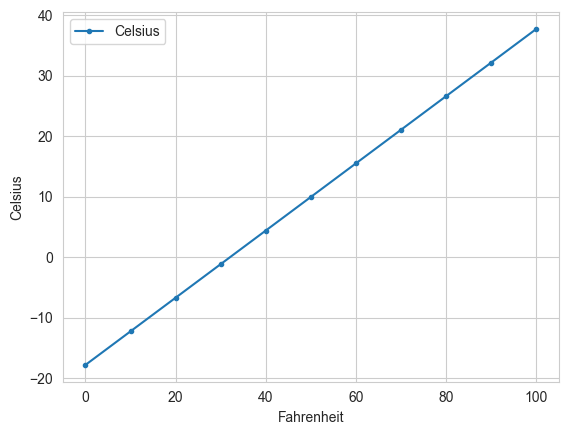

In [103]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [104]:
nyc = pd.read_csv('C:\\Repos\\datafun-07-ml\\data\\raw\\ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [105]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [106]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [107]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [108]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [109]:
nyc.Date.dtype

dtype('int64')

In [110]:
nyc.Date = nyc.Date.floordiv(100)

In [111]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [112]:
pd.set_option('display.precision', 2)

In [113]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [114]:
from scipy import stats

In [115]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [116]:
linear_regression.slope

np.float64(0.014771361132966163)

In [117]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

In [118]:
linear_regression.slope * 2019 + linear_regression.intercept

np.float64(38.51837136113297)

In [119]:
linear_regression.slope * 1850 + linear_regression.intercept

np.float64(36.022011329661694)

### Section 7 - Visualizations

In [120]:
import seaborn as sns

In [121]:
sns.set_style('whitegrid')

(10.0, 70.0)

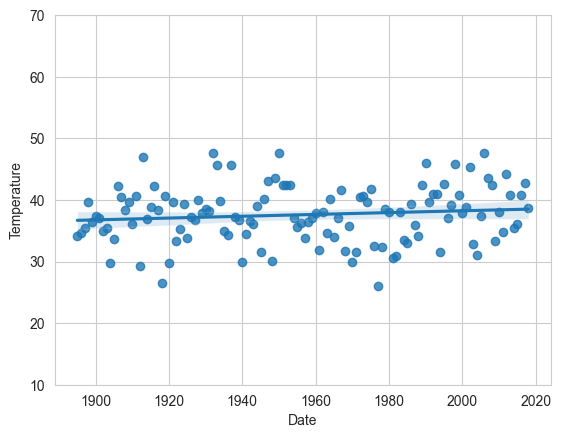

In [122]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70)

## Part 3 - Prediction

### Section 1 - Build the Model

In [123]:
%matplotlib inline
import pandas as pd

In [124]:
nyc = pd.read_csv('C:\\Repos\\datafun-07-ml\\data\\raw\\ave_hi_nyc_jan_1895-2018.csv')

In [125]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [126]:
nyc.Date = nyc.Date.floordiv(100)

In [127]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11
)

In [130]:
X_train.shape

(93, 1)

In [131]:
X_test.shape

(31, 1)

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
linear_regression = LinearRegression()

In [134]:
linear_regression.fit(X=X_train, y=y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [135]:
linear_regression.coef_

array([0.01939167])

In [136]:
linear_regression.intercept_

np.float64(-0.30779820252656975)

### Section 2 - Test the Model

In [137]:
predicted = linear_regression.predict(X_test)

In [138]:
expected = y_test

In [139]:
for p, e in zip(predicted[::5], expected[::5], strict=False):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [140]:
def predict(x: float):
    return linear_regression.coef_ * x + linear_regression.intercept_

In [141]:
predict(2019)

array([38.84399018])

In [142]:
predict(1890)

array([36.34246432])

In [143]:
predict(2024)

array([38.94094855])

### Section 4 - Visualizations

In [144]:
import seaborn as sns

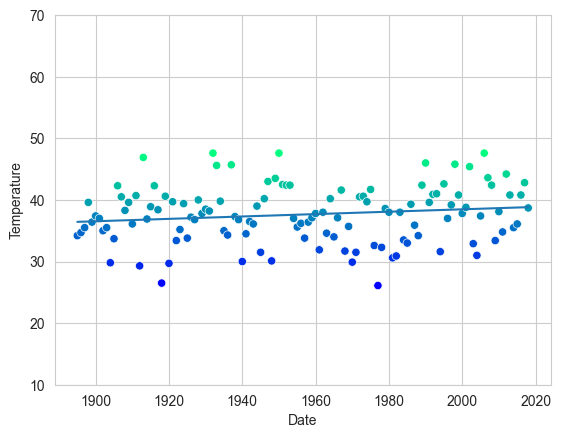

In [145]:
import matplotlib.pyplot as plt
import numpy as np

axes = sns.scatterplot(
    data=nyc,
    x='Date',
    y='Temperature',
    hue='Temperature',
    palette='winter',
    legend=False,
)

axes.set_ylim(10, 70)

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

line = plt.plot(x, y)

## Part 4 - My Insights

- I find the Part 2 method easier to understand than the Part 3 method. 
- I tend to prefer the method used in Part 2 because I have a background in math, and it is easy to connect many lines of code in the Part 2 method to basic concepts in algebra (ex. slope-intercept form of a line). The Part 2 method also seems to require fewer lines of code than the Part 3 method. 
- That said, I do appreciate that the Part 3 method shows the predicted vs. expected values for temperatures at various dates. I feel as though it would be simple to calculate residuals (how far each data point deviates from the line of best fit) after finding that info. 
- I also appreciate the trends in shading with the data points in the Part 3 scatterplot (something that the Part 2 scatterplot lacks), and I wonder if that shading can be manipulated in a way that highlights outliers (farther away from line of best fit in either direction --> darker shading).
- Overall, it seems to me that the Part 2 method is a good place to start with doing regression in a Jupyter notebook for the first time, while the Part 3 method is better for those more experienced with regression who are looking for a more robust array of visualization options for the data they wrangle.